In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
data = pd.read_csv('exe2_phase1.csv')

# Print the first 5 rows of the dataset
data.head()

,x1,x2,x3,x4
0,118.642,43.741,0.061,185.477
1,120.962,44.737,-0.299,41.118
2,120.134,42.711,-0.146,161.445
3,121.461,44.989,-0.033,101.318
4,119.784,45.064,-0.019,83.103


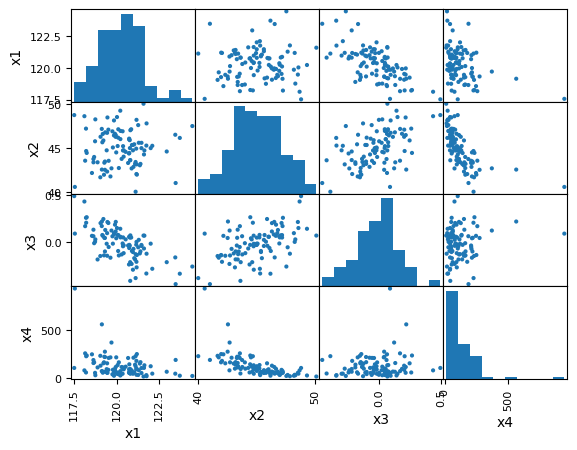

In [2]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

In [3]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data.mean()) / data.std()

data_std.describe()

,x1,x2,x3,x4
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-1.119105e-15,-9.769963e-17,-1.121325e-16,-1.509903e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.140270e+00,-2.438833e+00,-2.530554e+00,-9.088013e-01
25%,-7.368794e-01,-7.735924e-01,-6.621119e-01,-5.777955e-01
50%,-1.499783e-02,-2.365377e-02,5.292707e-03,-2.603360e-01
75%,6.247859e-01,7.271310e-01,5.418336e-01,3.015521e-01
max,3.215214e+00,2.434075e+00,2.971535e+00,6.893177e+00


In [4]:
corr_matrix = data.corr()
print(corr_matrix)

          x1        x2        x3        x4
x1  1.000000  0.021486 -0.663208 -0.365201
x2  0.021486  1.000000  0.478811 -0.635082
x3 -0.663208  0.478811  1.000000  0.120881
x4 -0.365201 -0.635082  0.120881  1.000000


In [5]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca_std = PCA()
# Fit the PCA object to the data
pca_std.fit(data_std)
# Print the eigenvalues
print("Eigenvalues \n", pca_std.explained_variance_)
# Print the eigenvectors
print("\nEigenvectors \n", pca_std.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca_std.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca_std.explained_variance_ratio_))


Eigenvalues 
 [1.81770755 1.73500337 0.34075332 0.10653576]

Eigenvectors 
 [[-0.66000705  0.18978272  0.68314672  0.24836216]
 [-0.16493647 -0.70579477 -0.20266437  0.65846553]
 [ 0.6655908   0.29669082  0.34571009  0.59114125]
 [-0.30688034  0.61466318 -0.61050982  0.39407029]]

Explained variance ratio 
 [0.45442689 0.43375084 0.08518833 0.02663394]

Cumulative explained variance ratio 
 [0.45442689 0.88817773 0.97336606 1.        ]


2

In [8]:
# Compute the scores
scores = pca_std.transform(data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3','z4'])
# Print the first rows of the scores dataframe
scores_df.head()

,z1,z2,z3,z4
0,1.173699,0.922471,-0.544887,-0.062711
1,-1.650105,-0.088546,-0.650716,0.482827
2,-0.554396,1.194681,-0.461069,-0.067277
3,-0.698764,-0.218157,0.476338,-0.305517
4,0.180913,-0.147447,-0.437819,0.004320


In [9]:
# First let's save in an array the mean and standard deviation of the original data
mean = data.mean()
std = data.std()

# Compute the reconstructed data_std using the first two principal components
reconstructed_data_std = scores_df[['z1', 'z2']].dot(pca_std.components_[0:2, :])
# Now use the mean and standard deviation to compute the reconstructed data
reconstructed_data = reconstructed_data_std.dot(np.diag(std)) + np.asarray(mean)

# Compare the original data with the reconstructed data
print("Original data\n", data.head())
print("\nReconstructed (ORIGINAL) data\n", reconstructed_data.head())



Original data
         x1      x2     x3       x4
0  118.642  43.741  0.061  185.477
1  120.962  44.737 -0.299   41.118
2  120.134  42.711 -0.146  161.445
3  121.461  44.989 -0.033  101.318
4  119.784  45.064 -0.019   83.103

Reconstructed (ORIGINAL) data
             0          1         2           3
0  119.086459  44.155067  0.086805  226.696518
1  121.714286  44.522501 -0.209640   64.222230
2  120.504445  43.079439 -0.125656  196.989501
3  120.929343  45.085098 -0.093383   82.160713
4  120.162853  45.327157  0.007477  113.660756
